### Keras Tutorial on Dogs vs Cats

We're going to try to create a model to enter the Dogs vs Cats competition at Kaggle. There are 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for this competition. According to the Kaggle web-site, when this competition was launched (end of 2013): "State of the art: The current literature suggests machine classifiers can score above 80% accuracy on this task". So if we can beat 80%, then we will be at the cutting edge as of 2013!

Here we import the libraries we need. We'll learn about what each does during the course.

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
PATH = "data/dogscats/"
sz=224
batch_size=64

In [6]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras.applications import ResNet50
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.applications.resnet50 import preprocess_input
import os
import matplotlib.pyplot as plt

In [7]:
train_data_dir = f'{PATH}train'
validation_data_dir = f'{PATH}valid'

Let's first look at some Cat pictures — my favorite part!

In [8]:
os.listdir(PATH)

['train', 'valid']

In [9]:
os.listdir(f'{PATH}valid')

['cats', 'dogs']

In [10]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.1000.jpg',
 'cat.1001.jpg',
 'cat.1002.jpg',
 'cat.1003.jpg',
 'cat.1004.jpg']

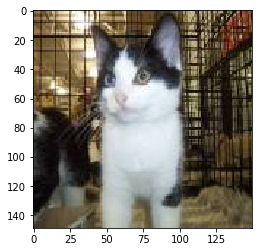

In [11]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [9]:
img.shape

(149, 150, 3)

In [12]:
img[:4,:4]

array([[[140, 112,  75],
        [140, 112,  75],
        [144, 116,  79],
        [146, 118,  81]],

       [[136, 108,  71],
        [137, 109,  72],
        [143, 115,  78],
        [146, 118,  81]],

       [[114,  88,  53],
        [116,  90,  55],
        [124,  98,  63],
        [127, 101,  66]],

       [[ 91,  67,  33],
        [ 93,  69,  35],
        [101,  77,  43],
        [103,  79,  45]]], dtype=uint8)

In [13]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(train_data_dir,
    target_size=(sz, sz),
    batch_size=batch_size, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
    shuffle=False,
    target_size=(sz, sz),
    batch_size=batch_size, class_mode='binary')

Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


In [14]:
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [15]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers: layer.trainable = False
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
model.fit_generator(train_generator, train_generator.n // batch_size, epochs=3, workers=4,
        validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

Epoch 1/3
31/32 [============================>.] - ETA: 1s - loss: 0.6995 - acc: 0.8826

In [ ]:
split_at = 140
for layer in model.layers[:split_at]: layer.trainable = False
for layer in model.layers[split_at:]: layer.trainable = True
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
model.fit_generator(train_generator, train_generator.n // batch_size, epochs=1, workers=3,
        validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)